### A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you work through the notebook(s) in this and future parts of this program, you will see some consistency in how to test your solutions to assure they match what we achieved!  In every workspace, there is a solution file and a test file.  There will be checks for each solution built into each notebook, but if you get stuck, you may also open the solution notebook to see how we find any of the solutions.  Let's take a look at an example.

### Question 1

**1.** Provide the number of rows and columns in this dataset.

In [2]:
# We solved this one for you by providing the number of rows and columns:
# You can see how we are prompted that we solved for the number of rows and cols correctly!

num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

t.check_rows_cols(num_rows, num_cols) 

Nice job there are 19102 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [13]:
# If we made a mistake - a different prompt will appear

flipped_num_rows = int(df.shape[1]) #Provide the number of rows in the dataset
flipped_num_cols = int(df.shape[0]) #Provide the number of columns in the dataset
print(flipped_num_rows)
print(flipped_num_cols)

t.check_rows_cols(flipped_num_rows, flipped_num_cols)

154
19102
That doesn't look like what we were expecting for the number of rows.
That doesn't look like what we were expecting for the number of columns.


In [12]:
# If you want to know more about what the test function is expecting, 
# you can read the documentation the same way as any other funtion

t.check_rows_cols?

Now that you are familiar with how to test your code - let's have you answer your first question:

### Question 2

**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [28]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
print(df.describe())
print(no_nulls)

display.HTML(t.no_null_cols(no_nulls))

         Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  19102.000000        16102.000000     15253.000000   7721.000000   
mean    9551.500000            7.343932         7.000721      3.685922   
std     5514.416757            1.919330         2.128648      7.330691   
min        1.000000            0.000000         0.000000      0.000000   
25%     4776.250000            6.000000         6.000000      0.000000   
50%     9551.500000            8.000000         7.000000      1.000000   
75%    14326.750000            9.000000         8.000000      3.000000   
max    19102.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary  
count               13452.000000    5009.000000      818.000000  
mean                    8.357865   58341.398571    32231.521687  
std                     1.405546   40753.384986    28543.877274  
min                     0.000000       0.000000        0.000000  
25%

### Question 3

**3.** Which columns have the most missing values?  Provide a set of column names that have more than 75% if their values missing.

In [10]:

most_missing_cols =set(df.columns[ df.isnull().mean()>0.75 ]) #Provide a set of columns with more than 75% of the values missing

 #set(df.columns[df.isnull().mean()]>75)
#print(df.describe())

t.most_missing_cols(most_missing_cols)

print(t.most_missing_cols(most_missing_cols))

154
Nice job that looks right!
Nice job that looks right!
None


### Question 4

**4.** Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.  Store this pandas series in **status_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

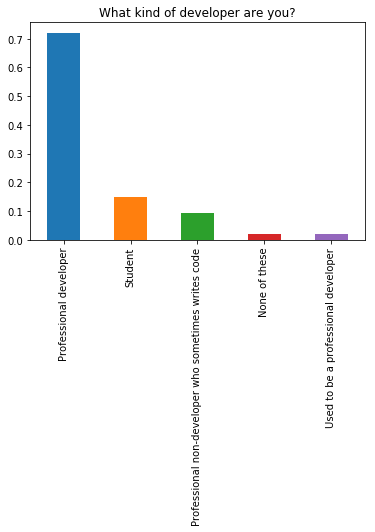

In [19]:
status_vals = df.Professional.value_counts() 
#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

### Question 5

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset along with the count of how many individuals received that formal education.  Store this pandas series in **ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


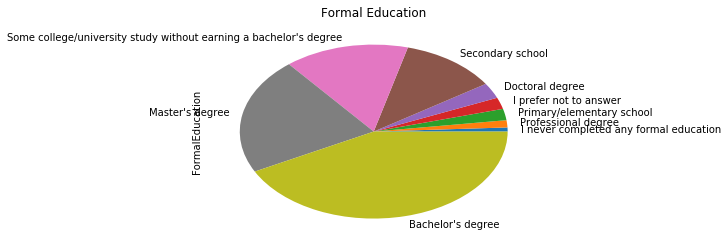

In [24]:
formal_edu_vals =df.FormalEducation.value_counts(ascending=True) #Provide a pandas series of the counts for each FormalEducation status

df.info()


# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(formal_edu_vals/df.shape[0]).plot(kind="pie");

plt.title("Formal Education");

### Question 6

**6.** Provide a pandas series of the different **Country** values in the dataset along with the count of how many individuals are from each country.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

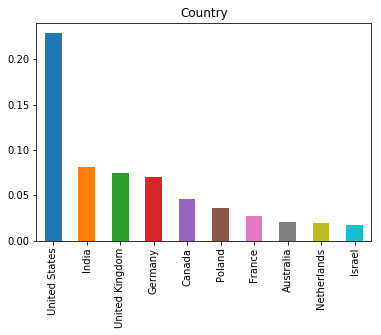

In [28]:
count_vals =df.Country.value_counts() #Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

Feel free to explore the dataset further to gain additional familiarity with the columns and rows in the dataset.  You will be working pretty closely with this dataset throughout this lesson.

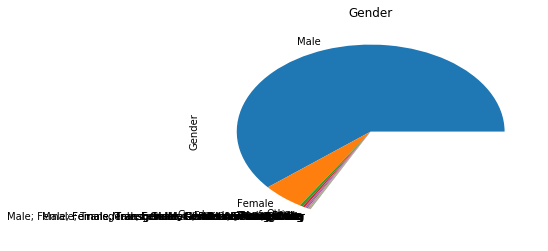

In [31]:
gender=df.Gender.value_counts()

(gender/df.shape[0]).plot(kind="pie");
plt.title("Gender");

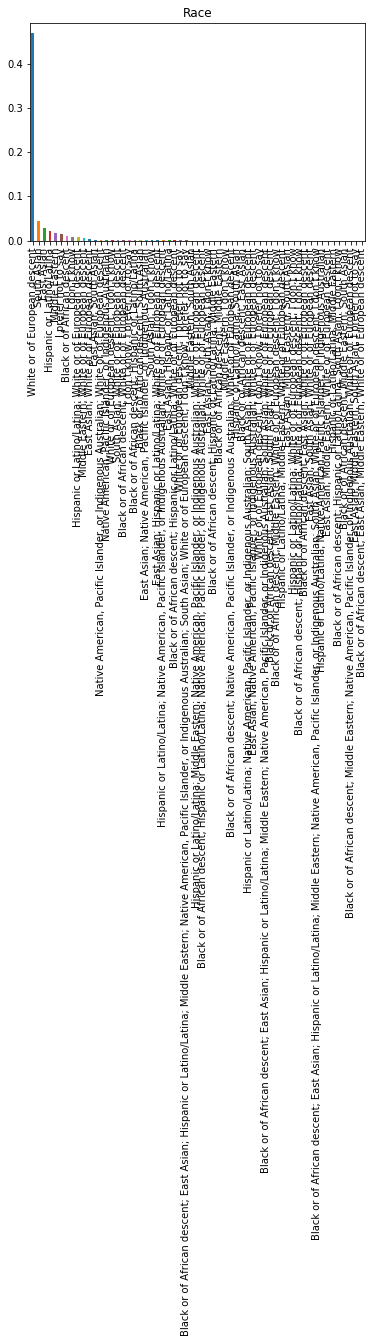

In [38]:
race=df.Race.value_counts()

(race/df.shape[0]).plot(kind="bar");
plt.title("Race");

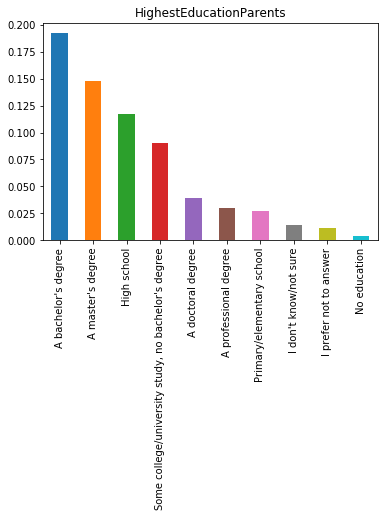

In [4]:
gender=df.HighestEducationParents.value_counts()

(gender/df.shape[0]).plot(kind="bar");
plt.title("HighestEducationParents");